In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import time
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("malicious_phish.csv")
len(df)

651191

In [ ]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


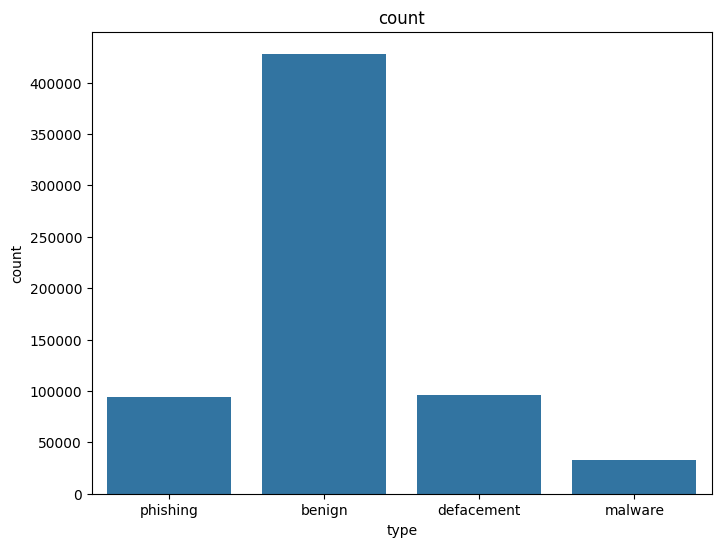

In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x="type",data=df)
plt.title("count")
plt.xlabel("type")
plt.ylabel("count")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with target variable
df = pd.concat([features_df, df['type']], axis=1)
df.head()

,url_length,num_digits,num_letters,num_special_chars,num_subdomains,num_query_params,type
0,16,0,13,3,2,0,phishing
1,35,1,29,5,2,0,benign
2,31,1,25,5,2,0,benign
3,88,7,63,18,3,1,defacement
4,235,22,199,14,2,1,defacement


normal logistic reg

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming df contains your data
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']]
y = df['type']  # Replace 'target' with your actual target column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
len(X_train)

520952

In [ ]:
len(X_test)

130239

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [ ]:
start_time = time.time()

model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training time: 12.73 seconds

Classification Report:
              precision    recall  f1-score   support

      benign       0.71      0.94      0.81     85328
  defacement       0.69      0.38      0.49     19355
     malware       0.76      0.38      0.51      6613
    phishing       0.34      0.06      0.11     18943

    accuracy                           0.70    130239
   macro avg       0.63      0.44      0.48    130239
weighted avg       0.66      0.70      0.65    130239



DT

In [ ]:
inputs=df.drop('type',axis='columns')
target=df['type']
target

,type
0,phishing
1,benign
2,benign
3,defacement
4,defacement
...,...
651186,phishing
651187,phishing
651188,phishing
651189,phishing


In [ ]:
inputs.head()

,url_length,num_digits,num_letters,num_special_chars,num_subdomains,num_query_params
0,16,0,13,3,2,0
1,35,1,29,5,2,0
2,31,1,25,5,2,0
3,88,7,63,18,3,1
4,235,22,199,14,2,1


##Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeClassifier()

In [ ]:
start_time = time.time()

model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training time: 1.96 seconds

Classification Report:
              precision    recall  f1-score   support

      benign       0.88      0.93      0.90     85328
  defacement       0.79      0.80      0.79     19355
     malware       0.91      0.86      0.89      6613
    phishing       0.71      0.53      0.61     18943

    accuracy                           0.85    130239
   macro avg       0.82      0.78      0.80    130239
weighted avg       0.84      0.85      0.84    130239



In [ ]:
model.score(X_test,y_test)

0.73

RF

In [ ]:
model.predict([[35,1,29,5,2,0]])

array(['benign'], dtype=object)

##SVM

In [ ]:
# Load the data
df = pd.read_csv("balanced_malicious_phish.csv")

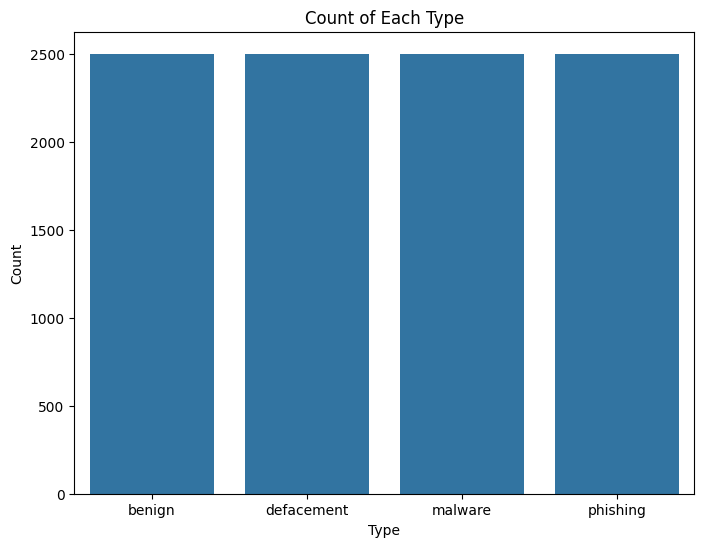

In [ ]:
# Plot the count of each type
plt.figure(figsize=(8,6))
sns.countplot(x="type", data=df)
plt.title("Count of Each Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# Feature extraction function
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

In [ ]:
# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

In [ ]:
# Combine features with the target variable
df = pd.concat([features_df, df['type']], axis=1)

In [ ]:
# Define inputs and target
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']]
y = df['type']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

8000

In [ ]:
len(X_test)

2000

In [ ]:
# SVM with RBF kernel and additional parameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
start_time = time.time()

svm_model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Training time: 3.48 seconds

Classification Report:
              precision    recall  f1-score   support

      benign       0.65      0.95      0.77       512
  defacement       0.86      0.85      0.85       500
     malware       1.00      0.87      0.93       492
    phishing       0.89      0.59      0.71       496

    accuracy                           0.82      2000
   macro avg       0.85      0.81      0.82      2000
weighted avg       0.85      0.82      0.82      2000



In [ ]:
svm_accuracy = svm_model.score(X_test, y_test)

In [ ]:
print(f'SVM (Linear Kernel) Accuracy: {svm_accuracy:.2f}')

SVM (Linear Kernel) Accuracy: 0.59


#**Random forest**



In [ ]:
df=pd.read_csv("malicious_phish.csv")
len(df)

651191

In [ ]:
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with target variable
df = pd.concat([features_df, df['type']], axis=1)
df.head()

,url_length,num_digits,num_letters,num_special_chars,num_subdomains,num_query_params,type
0,16,0,13,3,2,0,phishing
1,35,1,29,5,2,0,benign
2,31,1,25,5,2,0,benign
3,88,7,63,18,3,1,defacement
4,235,22,199,14,2,1,defacement


In [ ]:
# Assuming df contains your data
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']]
y = df['type']  # Replace 'target' with your actual target column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
start_time = time.time()

model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training time: 52.55 seconds

Classification Report:
              precision    recall  f1-score   support

      benign       0.88      0.93      0.91     85516
  defacement       0.79      0.81      0.80     19212
     malware       0.92      0.86      0.89      6470
    phishing       0.72      0.53      0.61     19041

    accuracy                           0.85    130239
   macro avg       0.83      0.78      0.80    130239
weighted avg       0.85      0.85      0.85    130239



##DL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'balanced_malicious_phish.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Feature extraction function
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with the target variable (the 'type' column)
df = pd.concat([features_df, df['type']], axis=1)

# Define the input features (X) and the target (y)
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']]
y = df['type']

# Encode the target labels (e.g., 'benign', 'malicious', etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert the labels to categorical format
y_categorical = to_categorical(y_encoded)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5258 - loss: 1.1341 - val_accuracy: 0.6481 - val_loss: 0.9183
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6657 - loss: 0.8424 - val_accuracy: 0.6500 - val_loss: 0.8648
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - loss: 0.8055 - val_accuracy: 0.6625 - val_loss: 0.8442
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6882 - loss: 0.7737 - val_accuracy: 0.6731 - val_loss: 0.8252
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6911 - loss: 0.7626 - val_accuracy: 0.6644 - val_loss: 0.8087
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6951 - loss: 0.7519 - val_accuracy: 0.6888 - val_loss: 0.7899
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6971 - loss: 0.7431 - val_accuracy: 0.6825 - val_loss: 0.7924
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7004 - loss: 0.7316 - val_accuracy: 0.

In [ ]:
# Load the dataset
file_path = 'malicious_phish.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Feature extraction function
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with the target variable (the 'type' column)
df = pd.concat([features_df, df['type']], axis=1)
# Define the input features (X) and the target (y)
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']]
y = df['type']

# Encode the target labels (e.g., 'benign', 'malicious', etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert the labels to categorical format
y_categorical = to_categorical(y_encoded)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2  # Import l2 for regularization
from tensorflow.keras.optimizers import AdamW

# Define the model with frozen layers (e.g., the first few layers)
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', trainable=True))
# model.add(Dropout(0.5))  # Add dropout to prevent overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), trainable=True))
model.add(Dense(32, activation='relu', trainable=True))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model with AdamW optimizer
model.compile(optimizer=AdamW(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for a few epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7596 - loss: 0.6793 - val_accuracy: 0.8004 - val_loss: 0.5475
Epoch 2/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8029 - loss: 0.5374 - val_accuracy: 0.8057 - val_loss: 0.5199
Epoch 3/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8096 - loss: 0.5226 - val_accuracy: 0.8137 - val_loss: 0.5143
Epoch 4/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.8129 - loss: 0.5121 - val_accuracy: 0.8189 - val_loss: 0.4977
Epoch 5/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8155 - loss: 0.5038 - val_accuracy: 0.8193 - val_loss: 0.4996
Epoch 6/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8173 - loss: 0.4986 - val_accuracy: 0.8195 - val_loss: 0.4988
Epoch 7/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8161 - loss: 0.4991 - val_accuracy: 0.8166 - val_loss: 0.4976
Epoch 8/10
13024/13024 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'balanced_malicious_phish.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Feature extraction function
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with the target variable (the 'type' column)
df = pd.concat([features_df, df['type']], axis=1)

# Define the input features (X) and the target (y)
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']]
y = df['type']


##IMPROVISED DL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset (replace with your dataset path)
df=pd.read_csv("balanced_malicious_phish.csv")



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example dataset with URL text and labels

# Tokenizing the URLs
tokenizer = Tokenizer(char_level=True)  # Treat URLs as character-level sequences
tokenizer.fit_on_texts(df['url'])

# Convert URLs into sequences of integers
X = tokenizer.texts_to_sequences(df['url'])
max_len = 100  # Maximum length of a URL sequence
X = pad_sequences(X, maxlen=max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['type'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep learning model with LSTM
model = Sequential()

# Embedding layer to learn representations of characters in URLs
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# LSTM layer to capture sequential patterns in the URLs
model.add(LSTM(128, return_sequences=True))
model.add(GlobalMaxPooling1D())  # Aggregate the most important features

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for multi-class classification (4 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1] * 100:.2f}%")


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4274 - loss: 1.2106 - val_accuracy: 0.7345 - val_loss: 0.6731
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7097 - loss: 0.6952 - val_accuracy: 0.7705 - val_loss: 0.5600
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7513 - loss: 0.6269 - val_accuracy: 0.7985 - val_loss: 0.5088
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7846 - loss: 0.5693 - val_accuracy: 0.8285 - val_loss: 0.4622
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8070 - loss: 0.5258 - val_accuracy: 0.8555 - val_loss: 0.4135
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8301 - loss: 0.4576 - val_accuracy: 0.8605 - val_loss: 0.3768
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8571 - loss: 0.4082 - val_accuracy: 0.8215 - val_loss: 0.4731
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8613 - loss: 0.4078 - val_accurac

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Conv1D, Bidirectional, MultiHeadAttention, LayerNormalization, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your dataset with 'url' and 'type' columns

# Tokenizing the URLs (character-level)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['url'])

# Convert URLs into sequences of integers
X = tokenizer.texts_to_sequences(df['url'])
max_len = 150  # Increase sequence length to capture more details
X = pad_sequences(X, maxlen=max_len)

# Label encoding the target
le = LabelEncoder()
y = le.fit_transform(df['type'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Input layer
input_layer = Input(shape=(max_len,))

# Embedding layer for character representations
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len)(input_layer)

# CNN layer to capture local patterns in URLs
conv_layer = Conv1D(128, kernel_size=5, activation='relu', padding='same')(embedding_layer)

# Bidirectional LSTM layers to capture sequential patterns
lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(conv_layer)

# Self-Attention Layer (MultiHeadAttention)
attention_layer = MultiHeadAttention(num_heads=4, key_dim=128)(lstm_layer, lstm_layer)

# Layer normalization to stabilize training
norm_layer = LayerNormalization()(attention_layer)

# Global Max Pooling to extract the most important information
pooling_layer = GlobalMaxPooling1D()(norm_layer)

# Dense layers for classification with L2 regularization
dense_layer_1 = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(pooling_layer)
dropout_layer_1 = Dropout(0.4)(dense_layer_1)
dense_layer_2 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout_layer_1)
dropout_layer_2 = Dropout(0.4)(dense_layer_2)

# Output layer for multi-class classification (4 classes)
output_layer = Dense(4, activation='softmax')(dropout_layer_2)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 40 epochs without EarlyStopping
history = model.fit(X_train, y_train, epochs=40, batch_size=32,  # Reduce batch size
                    validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1] * 100:.2f}%")


Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.3882 - loss: 5.0291 - val_accuracy: 0.7140 - val_loss: 3.3460
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6980 - loss: 3.1537 - val_accuracy: 0.7585 - val_loss: 2.4667
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7527 - loss: 2.3649 - val_accuracy: 0.7940 - val_loss: 1.9031
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7844 - loss: 1.8277 - val_accuracy: 0.8165 - val_loss: 1.5204
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7977 - loss: 1.4935 - val_accuracy: 0.8215 - val_loss: 1.2521
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8184 - loss: 1.2246 - val_accuracy: 0.8295 - val_loss: 1.0548
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8292 - loss: 1.0363 - val_accuracy: 0.8325 - val_loss: 0.9309
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8506 - loss: 0.8857 - val_a

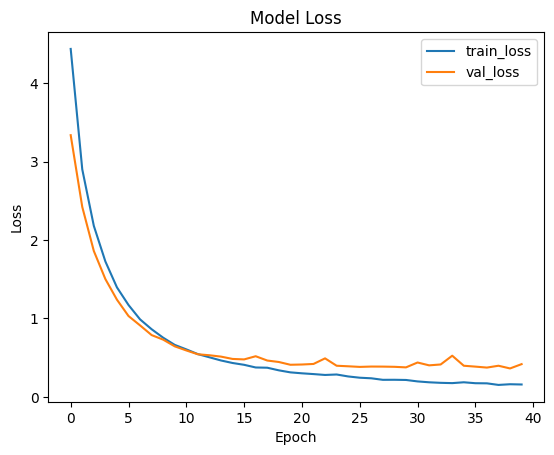

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

